<a href="https://colab.research.google.com/github/ckg/PredictBTCwithQuandlandLR/blob/main/Predict_BTC_with_Quandl_and_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install Quandl

In [2]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
quandl.ApiConfig.api_key="NwTmv3WUoLqkVHcEq7fK"

In [4]:
data = quandl.get("BCHARTS/BITSTAMPEUR")#, start_date="2017-01-01")#, end_date="2021-11-01")

In [5]:
data.tail()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2020-11-25,16111.63,16394.03,15517.14,15725.86,2466.065307,3.949411e+07,16015.031779
2020-11-26,15709.62,15861.01,13559.50,14415.00,9789.914798,1.406331e+08,14365.100109
2020-11-27,14408.56,14660.00,13767.20,14332.52,3242.723370,4.610854e+07,14219.078397
2020-11-28,14336.77,14975.00,14119.55,14835.73,2018.341107,2.957818e+07,14654.696213
2020-11-29,14830.64,15277.16,14673.44,15248.77,769.977550,1.157589e+07,15034.060280


In [6]:
df = data.copy()

In [7]:
df = df[["Close"]]

In [8]:
df.tail()

,Close
Date,
2020-11-25,15725.86
2020-11-26,14415.00
2020-11-27,14332.52
2020-11-28,14835.73
2020-11-29,15248.77


In [9]:
df.describe

<bound method NDFrame.describe of                Close
Date                
2018-02-13   6908.70
2018-02-14   7620.00
2018-02-15   8055.25
2018-02-16   8220.00
2018-02-17   8960.22
...              ...
2020-11-25  15725.86
2020-11-26  14415.00
2020-11-27  14332.52
2020-11-28  14835.73
2020-11-29  15248.77

[1009 rows x 1 columns]>

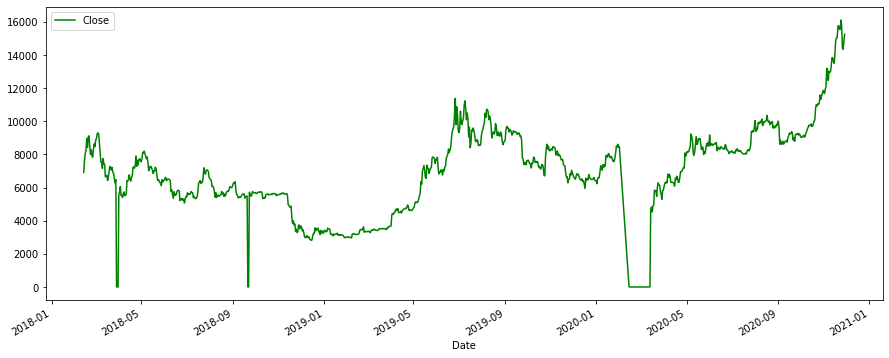

In [10]:
df["Close"].plot(figsize=(15,6), color="g")
plt.legend(loc="upper left")
plt.show()

In [11]:
forecast=10
df["Prediction"] = df["Close"].shift(-forecast) 

In [12]:
df

,Close,Prediction
Date,,
2018-02-13,6908.70,8272.80
2018-02-14,7620.00,7902.80
2018-02-15,8055.25,7825.58
2018-02-16,8220.00,8374.50
2018-02-17,8960.22,8623.44
...,...,...
2020-11-25,15725.86,NaN
2020-11-26,14415.00,NaN
2020-11-27,14332.52,NaN


In [13]:
X = np.array(df.drop(["Prediction"], 1)) # drops the  column and not the index

In [14]:
X = preprocessing.scale(X)

In [15]:
X

array([[0.02777203],
       [0.29376527],
       [0.4565286 ],
       ...,
       [2.80393671],
       [2.99211393],
       [3.14657175]])

In [16]:
X.mean()

1.9717736968565713e-16

In [17]:
X.std()

0.9999999999999999

In [18]:
X_forecast = X[-forecast:]
X = X[:-forecast]

In [19]:
X.size

999

In [20]:
y = np.array(df.drop(["Close"],1)) # drops the  column and not the index

In [21]:
y.size

1009

In [22]:
y = y[:-forecast]

In [23]:
y.size

999

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
clf = LinearRegression()

In [26]:
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
confidence = clf.score(X_test, y_test)

In [28]:
print(confidence)

0.8658868507501898


In [29]:
forecast_predicted = clf.predict(X_forecast)

In [30]:
print(forecast_predicted)

[[14835.31576962]
 [14831.57952316]
 [14647.12693467]
 [14643.93592992]
 [15156.30224496]
 [14813.75637616]
 [13642.05875965]
 [13568.33492995]
 [14018.12358595]
 [14387.31479135]]


In [31]:
dates = pd.date_range(start="2020-11-20", end="2020-11-29")

In [32]:
print(dates)

DatetimeIndex(['2020-11-20', '2020-11-21', '2020-11-22', '2020-11-23',
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29'],
              dtype='datetime64[ns]', freq='D')


(737607.0, 737809.0)

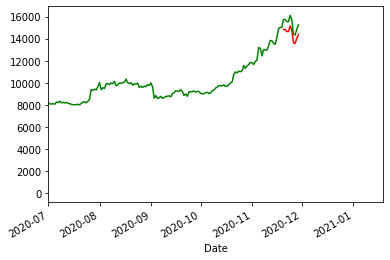

In [34]:
plt.plot(dates, forecast_predicted, color="r")
df["Close"].plot(color="g")
plt.xlim(xmin=datetime.date(2020,7,1))